In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


In [3]:
# Chargement du dataset
df = pd.read_csv('tayara_cars_cleaned.csv')

print("Shape du dataset:", df.shape)
print("\n" + "="*80)
df.head(10)

Shape du dataset: (5013, 13)



,prix,kilometrage,couleur_du_vehicule,etat_du_vehicule,boite,annee,cylindree,marque,modele,puissance_fiscale,type_de_carrosserie,carburant,kilometrage_log
0,10.341775,53000.00,Bleu,Avec kilométrage,manuelle,2019.0,1.2,suzuki,celerio,4.0,Compacte,Essence,10.878066
1,11.198228,49900.00,Noir,Avec kilométrage,automatique,2021.0,1.2,toyota,corolla verso,6.0,Compacte,Essence,10.817796
2,10.868587,170.00,Blanc,Avec kilométrage,manuelle,2014.0,1.6,bmw,serie 3,7.0,Berline,Essence,5.141664
3,13.815512,666106.56,Bleu,Avec kilométrage,automatique,2021.0,1.2,peugeot,3008,7.0,Autres,Essence,13.409206
4,10.859018,119000.00,Bleu,Nouveau,automatique,2021.0,0.8,ford,super duty,7.0,Berline,Essence,11.686887
5,10.239996,200000.00,Gris,Avec kilométrage,manuelle,2010.0,1.6,kia,cerato,7.0,Berline,Essence,12.206078
6,11.982935,76000.00,Noir,Avec kilométrage,automatique,2010.0,3.5,porsche,panamera,20.0,Berline,Essence,11.238502
7,11.350418,59400.00,Gris,Avec kilométrage,manuelle,2022.0,1.6,hyundai,kona,6.0,4 x 4,Hybride essence,10.992066
8,10.518700,60000.00,Noir,Avec kilométrage,manuelle,2019.0,0.8,citroen,c35,4.0,Autres,Essence,11.002117
9,10.799596,182.00,Blanc,Nouveau,automatique,2016.0,5.0,volkswagen,golf 7,5.0,Compacte,Essence,5.209486


In [4]:
# 📊 SÉPARATION DES VARIABLES NUMÉRIQUES ET CATÉGORIQUES
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclure 'prix' (notre target) et 'kilometrage_log'
numerical_cols = [col for col in numerical_cols if col not in ['prix', 'kilometrage_log']]

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numériques (features):")
print(numerical_cols)
print(f"Nombre: {len(numerical_cols)}")

print("\nVariables catégoriques (features):")
print(categorical_cols)
print(f"Nombre: {len(categorical_cols)}")


Variables numériques (features):
['kilometrage', 'annee', 'cylindree', 'puissance_fiscale']
Nombre: 4

Variables catégoriques (features):
['couleur_du_vehicule', 'etat_du_vehicule', 'boite', 'marque', 'modele', 'type_de_carrosserie', 'carburant']
Nombre: 7


In [5]:
# 🔄 ENCODING DES VARIABLES CATÉGORIQUES avec LabelEncoder
print("="*80)
print("ENCODING DES VARIABLES CATÉGORIQUES")
print("="*80)

# Créer une copie pour ne pas modifier l'original
df_encoded = df.copy()

# Appliquer LabelEncoder sur chaque colonne catégorielle
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    print(f"{col:25} : {len(le.classes_)} catégories encodées")

print("="*80)
print("✅ Encoding terminé")

print("="*80)

ENCODING DES VARIABLES CATÉGORIQUES
couleur_du_vehicule       : 19 catégories encodées
etat_du_vehicule          : 6 catégories encodées
boite                     : 3 catégories encodées
marque                    : 59 catégories encodées
modele                    : 456 catégories encodées
type_de_carrosserie       : 10 catégories encodées
carburant                 : 10 catégories encodées
✅ Encoding terminé


In [6]:
# ----------------------
# TRAIN-TEST SPLIT
# ----------------------
print("="*80)
print("PRÉPARATION DES DONNÉES POUR L'ENTRAÎNEMENT")
print("="*80)

# Target: 'prix' (valeurs log-transformées)
y = df_encoded['prix']
X = df_encoded.drop('prix', axis=1)

print(f"\nTarget (y): 'prix' (log-transformé)")
print(f"  Forme: {y.shape}")
print(f"  Min: {y.min():.4f}, Max: {y.max():.4f}, Mean: {y.mean():.4f}")
print(f"\nFeatures (X): {X.shape[1]} variables")
print(f"  Forme: {X.shape}")

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Dimensions après split:")
print(f"  Train: X={X_train.shape}, y={y_train.shape}")
print(f"  Test:  X={X_test.shape}, y={y_test.shape}")

# Scaling des variables numériques uniquement
print(f"\n🔄 Scaling des variables numériques...")
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"\n✅ Préprocessing terminé")
print(f"  Features totales: {X_train.shape[1]}")
print("="*80)


PRÉPARATION DES DONNÉES POUR L'ENTRAÎNEMENT

Target (y): 'prix' (log-transformé)
  Forme: (5013,)
  Min: 9.2104, Max: 13.8155, Mean: 10.9817

Features (X): 12 variables
  Forme: (5013, 12)

📊 Dimensions après split:
  Train: X=(4010, 12), y=(4010,)
  Test:  X=(1003, 12), y=(1003,)

🔄 Scaling des variables numériques...

✅ Préprocessing terminé
  Features totales: 12


In [7]:


results = {}

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """
    Entraîne et évalue un modèle
    """
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métriques sur l'ensemble d'entraînement
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Métriques sur l'ensemble de test
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Validation croisée
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()
    
    return {
        'Model': name,
        'Train_RMSE': train_rmse,
        'Train_MAE': train_mae,
        'Train_R2': train_r2,
        'Test_RMSE': test_rmse,
        'Test_MAE': test_mae,
        'Test_R2': test_r2,
        'CV_RMSE': cv_rmse,
        'Predictions_Train': y_train_pred,
        'Predictions_Test': y_test_pred
    }


In [8]:
# ----------------------------------------------------------------
# 1. LINEAR REGRESSION
# ----------------------------------------------------------------

print("\n1. LINEAR REGRESSION")
print("-" * 35)

lr_model = LinearRegression()
results['Linear Regression'] = evaluate_model('Linear Regression', lr_model, 
                                              X_train, X_test, y_train, y_test)
print(f"  Train RMSE: {results['Linear Regression']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Linear Regression']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Linear Regression']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Linear Regression']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Linear Regression']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Linear Regression']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Linear Regression']['CV_RMSE']:.4f}")


1. LINEAR REGRESSION
-----------------------------------
  Train RMSE: 1.0676
  Test RMSE:  1.1084
  Train MAE:  0.7088
  Test MAE:   0.7435
  Train R²:   0.1005
  Test R²:    0.1004
  CV RMSE:    114146.4607


In [9]:
# ----------------------------------------------------------------
# 2. LASSO REGRESSION 0.02
# ----------------------------------------------------------------

print("\n2. LASSO REGRESSION")
print("-" * 35)

lasso_model = Lasso(alpha=0.001, max_iter=10000, random_state=42)
results['Lasso'] = evaluate_model('Lasso', lasso_model, 
                                 X_train, X_test, y_train, y_test)

print(f"  Train RMSE: {results['Lasso']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Lasso']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Lasso']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Lasso']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Lasso']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Lasso']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Lasso']['CV_RMSE']:.4f}")

# Nombre de coefficients non-nuls
non_zero_coef = np.sum(lasso_model.coef_ != 0)
print(f"  Coefficients non-nuls: {non_zero_coef}/{len(lasso_model.coef_)}")



2. LASSO REGRESSION
-----------------------------------
  Train RMSE: 1.0676
  Test RMSE:  1.1084
  Train MAE:  0.7090
  Test MAE:   0.7437
  Train R²:   0.1005
  Test R²:    0.1005
  CV RMSE:    1.0709
  Coefficients non-nuls: 11/12


In [10]:
# ----------------------------------------------------------------
# 3. RIDGE REGRESSION
# ----------------------------------------------------------------

print("\n3. RIDGE REGRESSION")
print("-" * 35)

ridge_model = Ridge(alpha=10, random_state=42)
results['Ridge'] = evaluate_model('Ridge', ridge_model, 
                                 X_train, X_test, y_train, y_test)

print(f"  Train RMSE: {results['Ridge']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Ridge']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Ridge']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Ridge']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Ridge']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Ridge']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Ridge']['CV_RMSE']:.4f}")


3. RIDGE REGRESSION
-----------------------------------
  Train RMSE: 1.0676
  Test RMSE:  1.1085
  Train MAE:  0.7088
  Test MAE:   0.7436
  Train R²:   0.1005
  Test R²:    0.1004
  CV RMSE:    1.0709


In [11]:
# ----------------------------------------------------------------
# 4. ELASTIC NET
# ----------------------------------------------------------------

print("\n4. ELASTIC NET")
print("-" * 35)

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000, 
                             random_state=42)
results['ElasticNet'] = evaluate_model('ElasticNet', elasticnet_model, 
                                      X_train, X_test, y_train, y_test)

print(f"  Train RMSE: {results['ElasticNet']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['ElasticNet']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['ElasticNet']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['ElasticNet']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['ElasticNet']['Train_R2']:.4f}")
print(f"  Test R²:    {results['ElasticNet']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['ElasticNet']['CV_RMSE']:.4f}")

non_zero_coef_en = np.sum(elasticnet_model.coef_ != 0)
print(f"  Coefficients non-nuls: {non_zero_coef_en}/{len(elasticnet_model.coef_)}")



4. ELASTIC NET
-----------------------------------
  Train RMSE: 1.0676
  Test RMSE:  1.1084
  Train MAE:  0.7089
  Test MAE:   0.7436
  Train R²:   0.1005
  Test R²:    0.1004
  CV RMSE:    1.0709
  Coefficients non-nuls: 12/12



----------------------------------------------------------------------
COMPARAISON DES MODÈLES
----------------------------------------------------------------------

TABLEAU COMPARATIF:
           Modèle  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  Train_R2  Test_R2       CV_RMSE
Linear Regression    1.067616   1.108447   0.708765  0.743524  0.100498 0.100408 114146.460718
            Lasso    1.067619   1.108414   0.709017  0.743722  0.100492 0.100461      1.070869
            Ridge    1.067616   1.108459   0.708827  0.743601  0.100497 0.100388      1.070909
       ElasticNet    1.067617   1.108432   0.708901  0.743635  0.100496 0.100433      1.070891


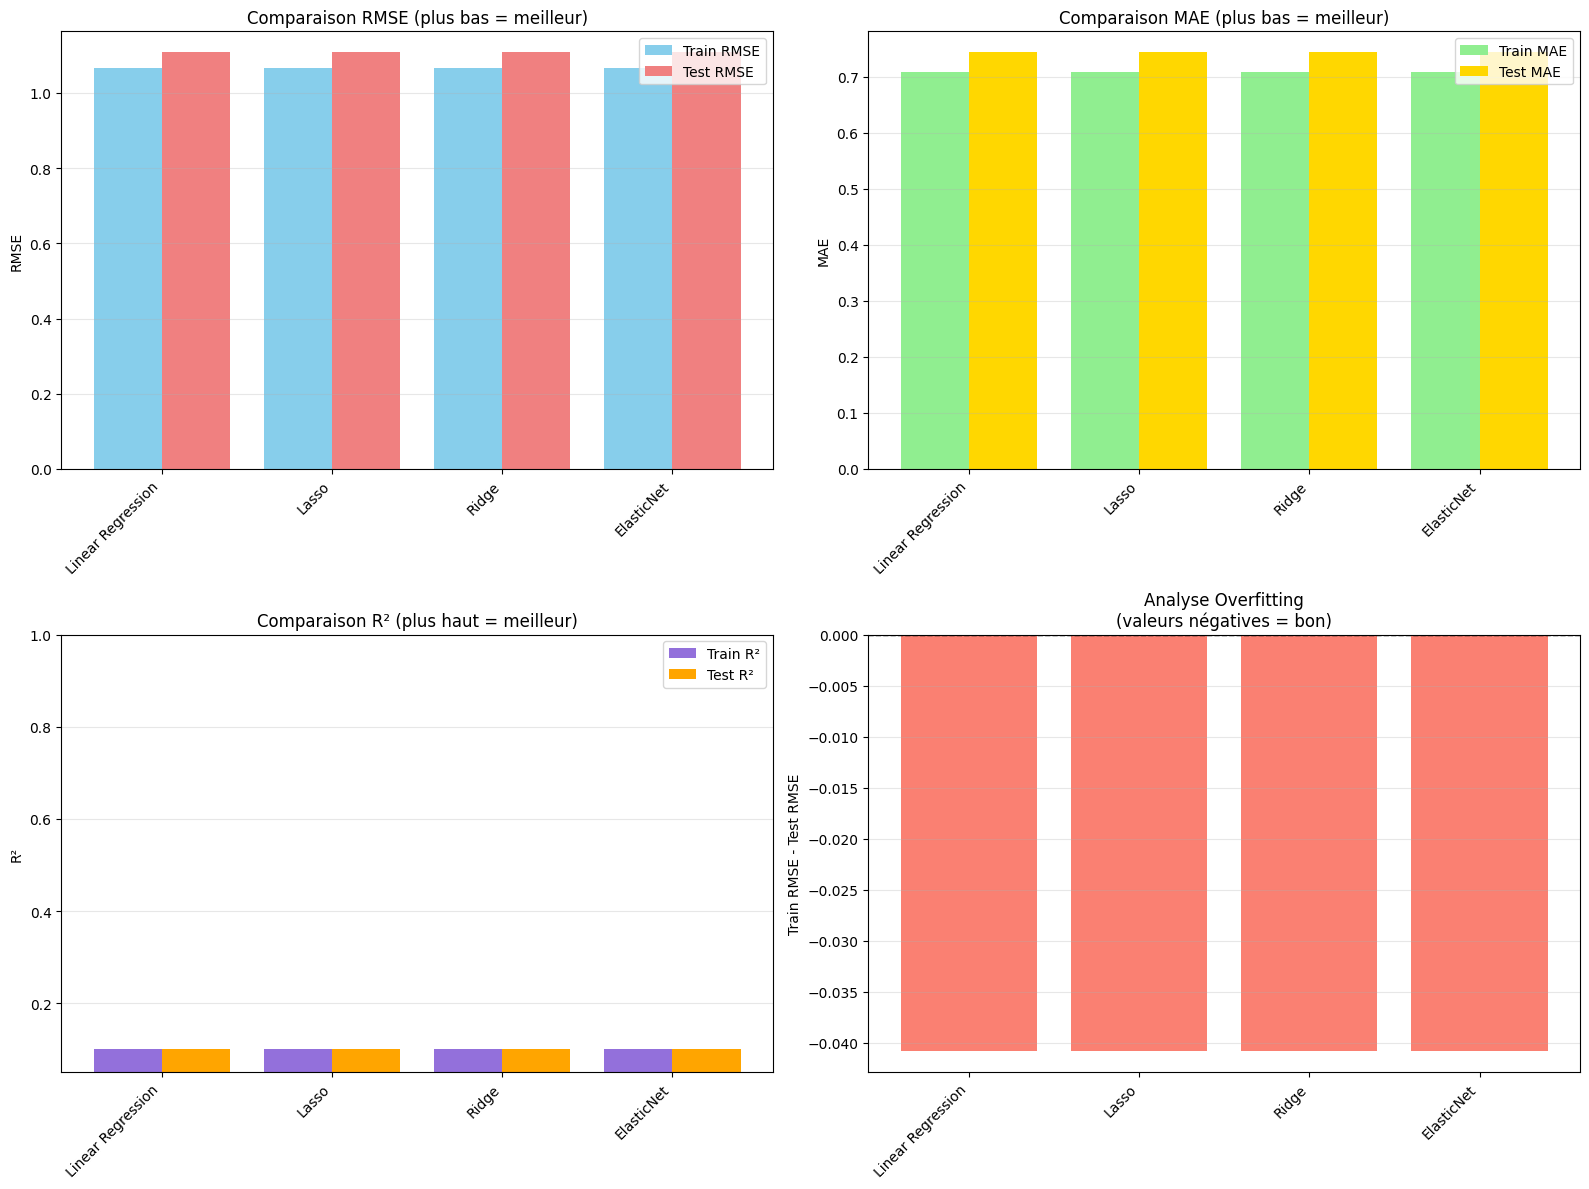

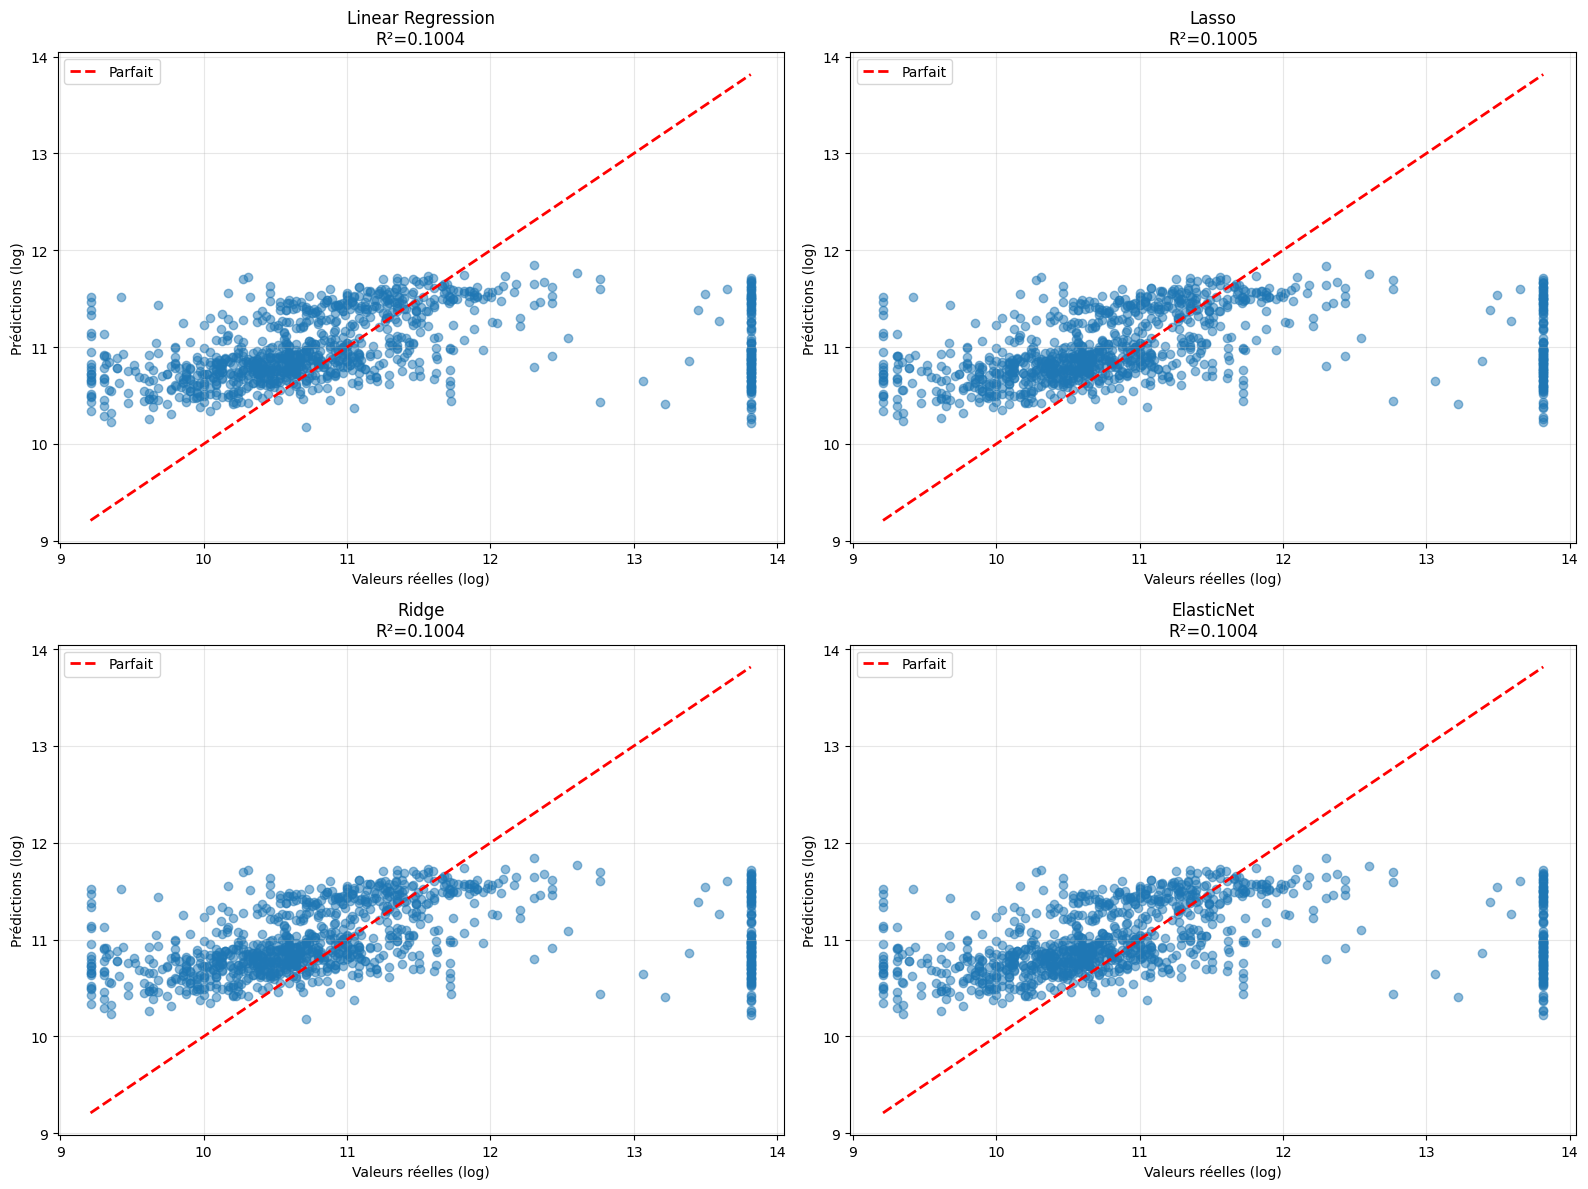

In [12]:
# ----------------------------------------------------------------
# COMPARAISON DES MODÈLES
# ----------------------------------------------------------------

from matplotlib import pyplot as plt


print("\n" + "-"*70)
print("COMPARAISON DES MODÈLES")
print("-"*70)

comparison_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Train_RMSE': [results[m]['Train_RMSE'] for m in results.keys()],
    'Test_RMSE': [results[m]['Test_RMSE'] for m in results.keys()],
    'Train_MAE': [results[m]['Train_MAE'] for m in results.keys()],
    'Test_MAE': [results[m]['Test_MAE'] for m in results.keys()],
    'Train_R2': [results[m]['Train_R2'] for m in results.keys()],
    'Test_R2': [results[m]['Test_R2'] for m in results.keys()],
    'CV_RMSE': [results[m]['CV_RMSE'] for m in results.keys()]
})

print("\nTABLEAU COMPARATIF:")
print(comparison_df.to_string(index=False))

# Visualisation de la comparaison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = list(results.keys())
x_pos = np.arange(len(models))

# RMSE Comparison
axes[0, 0].bar(x_pos - 0.2, comparison_df['Train_RMSE'], 0.4, 
              label='Train RMSE', color='skyblue')
axes[0, 0].bar(x_pos + 0.2, comparison_df['Test_RMSE'], 0.4, 
              label='Test RMSE', color='lightcoral')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('Comparaison RMSE (plus bas = meilleur)')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# MAE Comparison
axes[0, 1].bar(x_pos - 0.2, comparison_df['Train_MAE'], 0.4, 
              label='Train MAE', color='lightgreen')
axes[0, 1].bar(x_pos + 0.2, comparison_df['Test_MAE'], 0.4, 
              label='Test MAE', color='gold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Comparaison MAE (plus bas = meilleur)')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# R² Comparison
axes[1, 0].bar(x_pos - 0.2, comparison_df['Train_R2'], 0.4, 
              label='Train R²', color='mediumpurple')
axes[1, 0].bar(x_pos + 0.2, comparison_df['Test_R2'], 0.4, 
              label='Test R²', color='orange')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(models, rotation=45, ha='right')
axes[1, 0].set_ylabel('R²')
axes[1, 0].set_title('Comparaison R² (plus haut = meilleur)')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].set_ylim([min(comparison_df['Test_R2'])-0.05, 1.0])

# Overfitting analysis (différence Train-Test)
overfit_rmse = comparison_df['Train_RMSE'] - comparison_df['Test_RMSE']
axes[1, 1].bar(x_pos, overfit_rmse, color='salmon')
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models, rotation=45, ha='right')
axes[1, 1].set_ylabel('Train RMSE - Test RMSE')
axes[1, 1].set_title('Analyse Overfitting\n(valeurs négatives = bon)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Prédictions vs Valeurs réelles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, model_name in enumerate(models):
    y_pred = results[model_name]['Predictions_Test']
    
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Parfait')
    axes[i].set_xlabel('Valeurs réelles (log)')
    axes[i].set_ylabel('Prédictions (log)')
    axes[i].set_title(f'{model_name}\nR²={results[model_name]["Test_R2"]:.4f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
# ================================================================
# III. SÉLECTION DE VARIABLES - BACKWARD ELIMINATION
# ================================================================

print("\n\n" + "="*70)
print("PARTIE III: SÉLECTION DE VARIABLES PAR BACKWARD ELIMINATION")
print("="*70)

print("\n" + "-"*70)
print("BACKWARD ELIMINATION")
print("-"*70)

def backward_elimination(X, y, significance_level=0.05):
    """
    Effectue une élimination backward basée sur les p-values
    
    Paramètres:
    -----------
    X : DataFrame
        Features
    y : Series
        Target
    significance_level : float
        Seuil de significativité (défaut: 0.05)
    
    Retourne:
    ---------
    selected_features : list
        Liste des features sélectionnées
    """
    features = list(X.columns)
    removed_features = []
    
    print(f"\nDébut: {len(features)} variables")
    print(f"Seuil de significativité: {significance_level}")
    
    iteration = 0
    while True:
        iteration += 1
        
        # Ajouter une constante
        X_with_const = sm.add_constant(X[features])
        
        # Ajuster le modèle
        model = sm.OLS(y, X_with_const).fit()
        
        # Trouver la variable avec la p-value la plus élevée
        p_values = model.pvalues.iloc[1:]  # Exclure la constante
        max_p_value = p_values.max()
        
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            removed_features.append((excluded_feature, max_p_value))
            
            if iteration <= 10 or iteration % 10 == 0:
                print(f"Itération {iteration}: Retrait de '{excluded_feature}' (p-value={max_p_value:.4f})")
        else:
            break
    
    print(f"\nTerminé après {iteration} itérations")
    print(f"Variables conservées: {len(features)}")
    print(f"Variables retirées: {len(removed_features)}")
    
    return features, removed_features

# Filtrer uniquement les colonnes numériques
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Appliquer backward elimination
selected_features, removed_features = backward_elimination(X_train_numeric, y_train, 
                                                          significance_level=0.05)

print(f"\n{len(selected_features)} variables sélectionnées sur {X_train.shape[1]}")
print(f"Réduction: {(1 - len(selected_features)/X_train.shape[1])*100:.1f}%")

# Afficher quelques variables retirées
print("\nPremières variables retirées (Top 10 p-values):")
removed_sorted = sorted(removed_features, key=lambda x: x[1], reverse=True)
for feat, pval in removed_sorted[:10]:
    print(f"  • {feat}: p-value = {pval:.6f}")

# Préparer les nouveaux ensembles train/test avec les variables sélectionnées
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"\nNouvelles dimensions:")
print(f"  X_train: {X_train_selected.shape}")
print(f"  X_test: {X_test_selected.shape}")




PARTIE III: SÉLECTION DE VARIABLES PAR BACKWARD ELIMINATION

----------------------------------------------------------------------
BACKWARD ELIMINATION
----------------------------------------------------------------------

Début: 12 variables
Seuil de significativité: 0.05
Itération 1: Retrait de 'carburant' (p-value=0.9816)
Itération 2: Retrait de 'etat_du_vehicule' (p-value=0.7879)
Itération 3: Retrait de 'modele' (p-value=0.7219)
Itération 4: Retrait de 'puissance_fiscale' (p-value=0.4974)

Terminé après 5 itérations
Variables conservées: 8
Variables retirées: 4

8 variables sélectionnées sur 12
Réduction: 33.3%

Premières variables retirées (Top 10 p-values):
  • carburant: p-value = 0.981557
  • etat_du_vehicule: p-value = 0.787935
  • modele: p-value = 0.721943
  • puissance_fiscale: p-value = 0.497412

Nouvelles dimensions:
  X_train: (4010, 8)
  X_test: (1003, 8)


In [14]:
# ----------------------------------------------------------------
# MODÉLISATION AVEC VARIABLES SÉLECTIONNÉES
# ----------------------------------------------------------------

print("\n" + "-"*70)
print("MODÉLISATION AVEC VARIABLES SÉLECTIONNÉES")
print("-"*70)

# Dictionnaire pour stocker les résultats avec sélection
results_selected = {}

# ----------------------------------------------------------------
# 1. LINEAR REGRESSION (avec sélection)
# ----------------------------------------------------------------

print("\n1. LINEAR REGRESSION (Variables sélectionnées)")
print("-" * 48)

lr_model_selected = LinearRegression()
results_selected['Linear Regression'] = evaluate_model(
    'Linear Regression', lr_model_selected, 
    X_train_selected, X_test_selected, y_train, y_test
)

print(f"  Train RMSE: {results_selected['Linear Regression']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results_selected['Linear Regression']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results_selected['Linear Regression']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results_selected['Linear Regression']['Test_MAE']:.4f}")
print(f"  Train R²:   {results_selected['Linear Regression']['Train_R2']:.4f}")
print(f"  Test R²:    {results_selected['Linear Regression']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results_selected['Linear Regression']['CV_RMSE']:.4f}")



----------------------------------------------------------------------
MODÉLISATION AVEC VARIABLES SÉLECTIONNÉES
----------------------------------------------------------------------

1. LINEAR REGRESSION (Variables sélectionnées)
------------------------------------------------
  Train RMSE: 1.0677
  Test RMSE:  1.1081
  Train MAE:  0.7092
  Test MAE:   0.7430
  Train R²:   0.1003
  Test R²:    0.1009
  CV RMSE:    1.0703


In [15]:
# ----------------------------------------------------------------
# 2. LASSO REGRESSION (avec sélection)
# ----------------------------------------------------------------

print("\n2. LASSO REGRESSION (Variables sélectionnées)")
print("-" * 48)

lasso_model_selected = Lasso(alpha=0.001, max_iter=10000, random_state=42)
results_selected['Lasso'] = evaluate_model(
    'Lasso', lasso_model_selected, 
    X_train_selected, X_test_selected, y_train, y_test
)

print(f"  Train RMSE: {results_selected['Lasso']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results_selected['Lasso']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results_selected['Lasso']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results_selected['Lasso']['Test_MAE']:.4f}")
print(f"  Train R²:   {results_selected['Lasso']['Train_R2']:.4f}")
print(f"  Test R²:    {results_selected['Lasso']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results_selected['Lasso']['CV_RMSE']:.4f}")


2. LASSO REGRESSION (Variables sélectionnées)
------------------------------------------------
  Train RMSE: 1.0677
  Test RMSE:  1.1081
  Train MAE:  0.7094
  Test MAE:   0.7432
  Train R²:   0.1003
  Test R²:    0.1009
  CV RMSE:    1.0703


In [16]:
# ----------------------------------------------------------------
# 3. RIDGE REGRESSION (avec sélection)
# ----------------------------------------------------------------

print("\n3. RIDGE REGRESSION (Variables sélectionnées)")
print("-" * 48)

ridge_model_selected = Ridge(alpha=10, random_state=42)
results_selected['Ridge'] = evaluate_model(
    'Ridge', ridge_model_selected, 
    X_train_selected, X_test_selected, y_train, y_test
)

print(f"  Train RMSE: {results_selected['Ridge']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results_selected['Ridge']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results_selected['Ridge']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results_selected['Ridge']['Test_MAE']:.4f}")
print(f"  Train R²:   {results_selected['Ridge']['Train_R2']:.4f}")
print(f"  Test R²:    {results_selected['Ridge']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results_selected['Ridge']['CV_RMSE']:.4f}")


3. RIDGE REGRESSION (Variables sélectionnées)
------------------------------------------------
  Train RMSE: 1.0677
  Test RMSE:  1.1082
  Train MAE:  0.7093
  Test MAE:   0.7431
  Train R²:   0.1003
  Test R²:    0.1009
  CV RMSE:    1.0703


In [17]:
# ----------------------------------------------------------------
# 4. ELASTIC NET (avec sélection)
# ----------------------------------------------------------------

print("\n4. ELASTIC NET (Variables sélectionnées)")
print("-" * 48)

elasticnet_model_selected = ElasticNet(alpha=0.001, l1_ratio=0.5, 
                                      max_iter=10000, random_state=42)
results_selected['ElasticNet'] = evaluate_model(
    'ElasticNet', elasticnet_model_selected, 
    X_train_selected, X_test_selected, y_train, y_test
)

print(f"  Train RMSE: {results_selected['ElasticNet']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results_selected['ElasticNet']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results_selected['ElasticNet']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results_selected['ElasticNet']['Test_MAE']:.4f}")
print(f"  Train R²:   {results_selected['ElasticNet']['Train_R2']:.4f}")
print(f"  Test R²:    {results_selected['ElasticNet']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results_selected['ElasticNet']['CV_RMSE']:.4f}")


4. ELASTIC NET (Variables sélectionnées)
------------------------------------------------
  Train RMSE: 1.0677
  Test RMSE:  1.1081
  Train MAE:  0.7093
  Test MAE:   0.7431
  Train R²:   0.1003
  Test R²:    0.1009
  CV RMSE:    1.0703



COMPARAISON FINALE: TOUTES VARIABLES VS VARIABLES SÉLECTIONNÉES

TABLEAU COMPARATIF FINAL:
           Modèle  Toutes_Var_Test_RMSE  Toutes_Var_Test_R2  Select_Var_Test_RMSE  Select_Var_Test_R2  Amélioration_RMSE  Amélioration_R2
Linear Regression              1.108447            0.100408              1.108144            0.100900           0.000303         0.000492
            Lasso              1.108414            0.100461              1.108123            0.100934           0.000292         0.000473
            Ridge              1.108459            0.100388              1.108152            0.100887           0.000307         0.000498
       ElasticNet              1.108432            0.100433              1.108134            0.100915           0.000297         0.000482


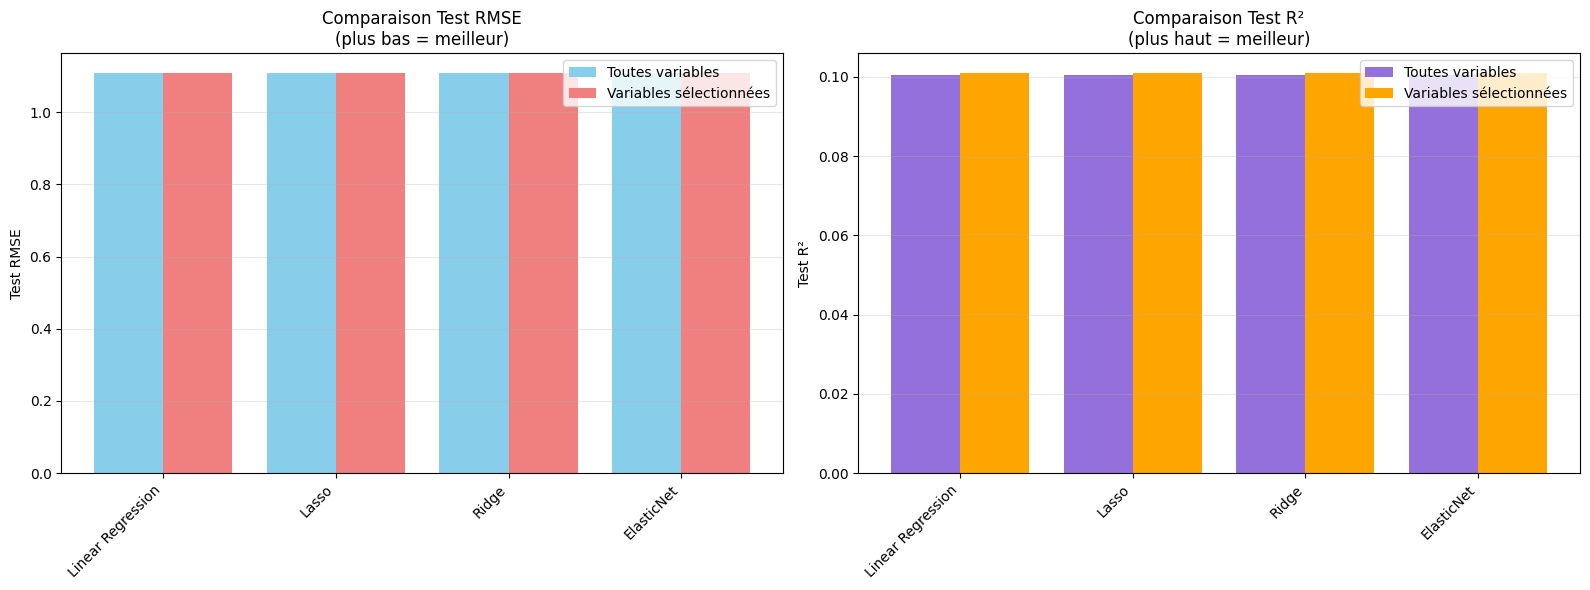

In [18]:
# ----------------------------------------------------------------
# COMPARAISON FINALE: AVEC ET SANS SÉLECTION
# ----------------------------------------------------------------

print("\n" + "="*70)
print("COMPARAISON FINALE: TOUTES VARIABLES VS VARIABLES SÉLECTIONNÉES")
print("="*70)

# Créer un DataFrame de comparaison
comparison_final = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Toutes_Var_Test_RMSE': [results[m]['Test_RMSE'] for m in results.keys()],
    'Toutes_Var_Test_R2': [results[m]['Test_R2'] for m in results.keys()],
    'Select_Var_Test_RMSE': [results_selected[m]['Test_RMSE'] for m in results_selected.keys()],
    'Select_Var_Test_R2': [results_selected[m]['Test_R2'] for m in results_selected.keys()],
})

# Calculer les améliorations
comparison_final['Amélioration_RMSE'] = comparison_final['Toutes_Var_Test_RMSE'] - comparison_final['Select_Var_Test_RMSE']
comparison_final['Amélioration_R2'] = comparison_final['Select_Var_Test_R2'] - comparison_final['Toutes_Var_Test_R2']

print("\nTABLEAU COMPARATIF FINAL:")
print(comparison_final.to_string(index=False))

# Visualisation de la comparaison finale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

models = list(results.keys())
x_pos = np.arange(len(models))

# RMSE Comparison
axes[0].bar(x_pos - 0.2, comparison_final['Toutes_Var_Test_RMSE'], 0.4, 
           label='Toutes variables', color='skyblue')
axes[0].bar(x_pos + 0.2, comparison_final['Select_Var_Test_RMSE'], 0.4, 
           label='Variables sélectionnées', color='lightcoral')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].set_ylabel('Test RMSE')
axes[0].set_title('Comparaison Test RMSE\n(plus bas = meilleur)')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# R² Comparison
axes[1].bar(x_pos - 0.2, comparison_final['Toutes_Var_Test_R2'], 0.4, 
           label='Toutes variables', color='mediumpurple')
axes[1].bar(x_pos + 0.2, comparison_final['Select_Var_Test_R2'], 0.4, 
           label='Variables sélectionnées', color='orange')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].set_ylabel('Test R²')
axes[1].set_title('Comparaison Test R²\n(plus haut = meilleur)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [19]:
# ----------------------------------------------------------------
# 5. RANDOM FOREST
# ----------------------------------------------------------------

print("\n5. RANDOM FOREST")
print("-" * 35)

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, 
                                min_samples_split=5, min_samples_leaf=2,
                                random_state=42, n_jobs=-1)
results['Random Forest'] = evaluate_model('Random Forest', rf_model, 
                                         X_train, X_test, y_train, y_test)

print(f"  Train RMSE: {results['Random Forest']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Random Forest']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Random Forest']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Random Forest']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Random Forest']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Random Forest']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Random Forest']['CV_RMSE']:.4f}")

# Importance des variables
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.coef_ if hasattr(rf_model, 'coef_') else rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 des variables les plus importantes:")
for i, row in feature_importance.head(10).iterrows():
    print(f"  {row['Feature']:30s}: {row['Importance']:.4f}")



5. RANDOM FOREST
-----------------------------------
  Train RMSE: 0.5887
  Test RMSE:  1.0317
  Train MAE:  0.3630
  Test MAE:   0.6545
  Train R²:   0.7265
  Test R²:    0.2206
  CV RMSE:    1.0032

Top 10 des variables les plus importantes:
  annee                         : 0.1907
  modele                        : 0.1399
  cylindree                     : 0.1144
  marque                        : 0.0938
  kilometrage_log               : 0.0935
  kilometrage                   : 0.0914
  boite                         : 0.0876
  type_de_carrosserie           : 0.0669
  couleur_du_vehicule           : 0.0593
  carburant                     : 0.0376



11. MODÈLE XGBOOST - ARBRE DE DÉCISION BOOSTÉ
❌ XGBoost n'est pas installé. Installation en cours...
✓ XGBoost installé et importé avec succès

----------------------------------------------------------------------
11.1. XGBOOST AVEC TOUTES LES VARIABLES
----------------------------------------------------------------------

📊 PERFORMANCES - XGBoost (toutes variables):
  • RMSE Test:       1.0284
  • MAE Test:        0.6358
  • R² Test:         0.2257
  • CV RMSE (5-fold): 1.0111

----------------------------------------------------------------------
11.2. XGBOOST AVEC VARIABLES SÉLECTIONNÉES
----------------------------------------------------------------------

📊 PERFORMANCES - XGBoost (variables sélectionnées):
  • RMSE Test:       1.0525
  • MAE Test:        0.6574
  • R² Test:         0.1889
  • CV RMSE (5-fold): 1.0199

----------------------------------------------------------------------
11.3. IMPORTANCE DES FEATURES (TOP 20)
---------------------------------------------------

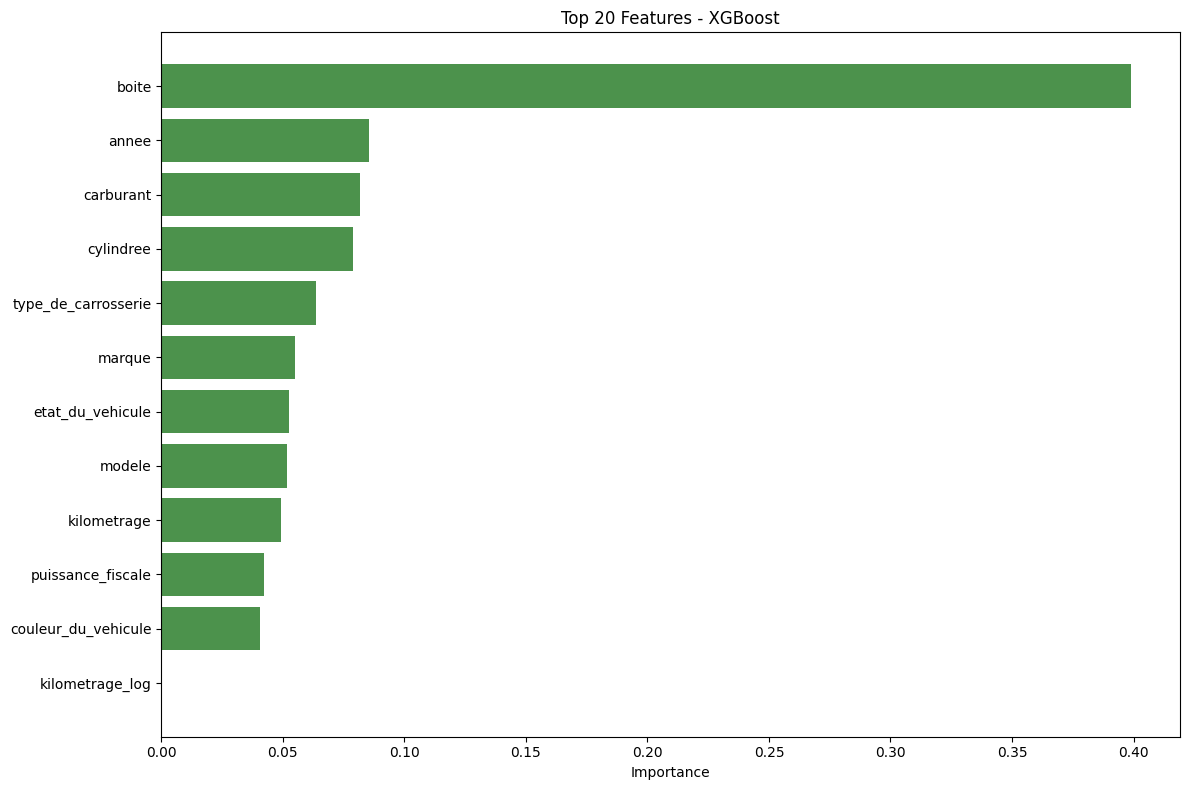


COMPARAISON FINALE - TOUS LES MODÈLES

📊 AVEC TOUTES LES VARIABLES:
                  Test_RMSE  Test_MAE   Test_R2        CV_RMSE
XGBoost            1.028384  0.635824   0.22567       1.011107
Random Forest      1.031714  0.654525  0.220647       1.003178
Lasso              1.108414  0.743722  0.100461       1.070869
ElasticNet         1.108432  0.743635  0.100433       1.070891
Linear Regression  1.108447  0.743524  0.100408  114146.460718
Ridge              1.108459  0.743601  0.100388       1.070909

📊 AVEC VARIABLES SÉLECTIONNÉES:
                  Test_RMSE  Test_MAE   Test_R2   CV_RMSE
XGBoost            1.052547  0.657361  0.188855   1.01987
Lasso              1.108123  0.743232  0.100934   1.07028
ElasticNet         1.108134  0.743144  0.100915  1.070277
Linear Regression  1.108144  0.743027    0.1009  1.070278
Ridge              1.108152  0.743101  0.100887  1.070272


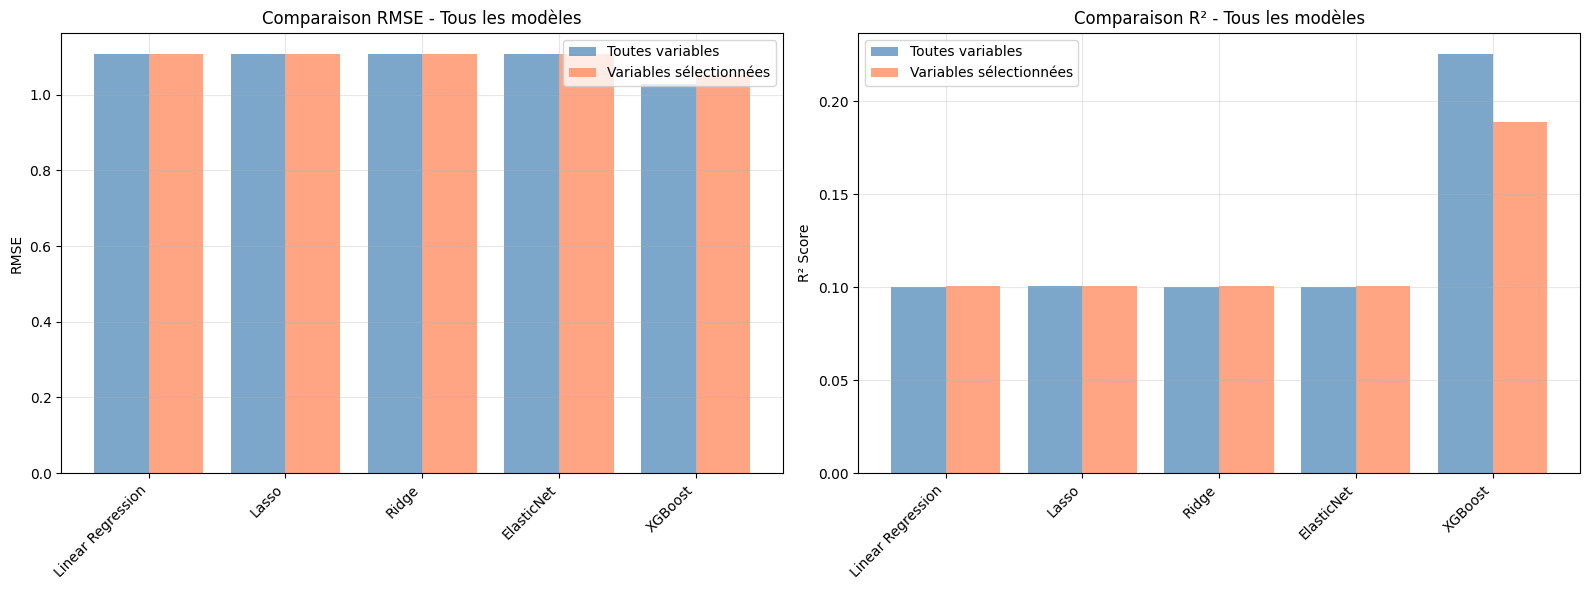


✅ Analyse XGBoost terminée!


In [20]:
# ----------------------------------------------------------------
# 11. AJOUT DU MODÈLE XGBOOST
# ----------------------------------------------------------------

print("\n" + "="*70)
print("11. MODÈLE XGBOOST - ARBRE DE DÉCISION BOOSTÉ")
print("="*70)

# Importer XGBoost
try:
    from xgboost import XGBRegressor
    print("✓ XGBoost importé avec succès")
except ImportError:
    print("❌ XGBoost n'est pas installé. Installation en cours...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'xgboost'])
    from xgboost import XGBRegressor
    print("✓ XGBoost installé et importé avec succès")

# Entraîner XGBoost sur les données complètes
print("\n" + "-"*70)
print("11.1. XGBOOST AVEC TOUTES LES VARIABLES")
print("-"*70)

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculer les métriques
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, 
                            cv=5, scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores.mean()

print(f"\n📊 PERFORMANCES - XGBoost (toutes variables):")
print(f"  • RMSE Test:       {rmse:.4f}")
print(f"  • MAE Test:        {mae:.4f}")
print(f"  • R² Test:         {r2:.4f}")
print(f"  • CV RMSE (5-fold): {cv_rmse:.4f}")

# Entraîner XGBoost sur les variables sélectionnées
print("\n" + "-"*70)
print("11.2. XGBOOST AVEC VARIABLES SÉLECTIONNÉES")
print("-"*70)

xgb_model_selected = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

xgb_model_selected.fit(X_train_selected, y_train)
y_pred_selected = xgb_model_selected.predict(X_test_selected)

# Calculer les métriques
rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))
mae_selected = mean_absolute_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

# Cross-validation
cv_scores_selected = cross_val_score(xgb_model_selected, X_train_selected, y_train, 
                                      cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_selected = -cv_scores_selected.mean()

print(f"\n📊 PERFORMANCES - XGBoost (variables sélectionnées):")
print(f"  • RMSE Test:       {rmse_selected:.4f}")
print(f"  • MAE Test:        {mae_selected:.4f}")
print(f"  • R² Test:         {r2_selected:.4f}")
print(f"  • CV RMSE (5-fold): {cv_rmse_selected:.4f}")

# Ajouter XGBoost aux résultats
results['XGBoost'] = {
    'Test_RMSE': rmse,
    'Test_MAE': mae,
    'Test_R2': r2,
    'CV_RMSE': cv_rmse
}

results_selected['XGBoost'] = {
    'Test_RMSE': rmse_selected,
    'Test_MAE': mae_selected,
    'Test_R2': r2_selected,
    'CV_RMSE': cv_rmse_selected
}

# Visualiser l'importance des features
print("\n" + "-"*70)
print("11.3. IMPORTANCE DES FEATURES (TOP 20)")
print("-"*70)

# Feature importance pour le modèle complet
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

print("\nTop 20 features les plus importantes (XGBoost):")
for i, row in feature_importance.iterrows():
    print(f"  {row['Feature']:30s}: {row['Importance']:.4f}")

# Visualisation
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(feature_importance['Feature'], feature_importance['Importance'], 
        color='darkgreen', alpha=0.7)
ax.set_xlabel('Importance')
ax.set_title('Top 20 Features - XGBoost')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

# Comparaison finale avec tous les modèles
print("\n" + "="*70)
print("COMPARAISON FINALE - TOUS LES MODÈLES")
print("="*70)

comparison_all = pd.DataFrame(results).T
comparison_all_selected = pd.DataFrame(results_selected).T

print("\n📊 AVEC TOUTES LES VARIABLES:")
print(comparison_all[['Test_RMSE', 'Test_MAE', 'Test_R2', 'CV_RMSE']].sort_values('Test_R2', ascending=False).to_string())

print("\n📊 AVEC VARIABLES SÉLECTIONNÉES:")
print(comparison_all_selected[['Test_RMSE', 'Test_MAE', 'Test_R2', 'CV_RMSE']].sort_values('Test_R2', ascending=False).to_string())

# Visualisation comparative (uniquement les modèles communs)
# Identifier les modèles présents dans les deux dictionnaires
common_models = [m for m in comparison_all.index if m in comparison_all_selected.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE
ax = axes[0]
x_pos = np.arange(len(common_models))
ax.bar(x_pos - 0.2, comparison_all.loc[common_models, 'Test_RMSE'], 0.4, 
       label='Toutes variables', alpha=0.7, color='steelblue')
ax.bar(x_pos + 0.2, comparison_all_selected.loc[common_models, 'Test_RMSE'], 0.4,
       label='Variables sélectionnées', alpha=0.7, color='coral')
ax.set_xticks(x_pos)
ax.set_xticklabels(common_models, rotation=45, ha='right')
ax.set_ylabel('RMSE')
ax.set_title('Comparaison RMSE - Tous les modèles')
ax.legend()
ax.grid(True, alpha=0.3)

# R²
ax = axes[1]
ax.bar(x_pos - 0.2, comparison_all.loc[common_models, 'Test_R2'], 0.4, 
       label='Toutes variables', alpha=0.7, color='steelblue')
ax.bar(x_pos + 0.2, comparison_all_selected.loc[common_models, 'Test_R2'], 0.4, 
       label='Variables sélectionnées', alpha=0.7, color='coral')
ax.set_xticks(x_pos)
ax.set_xticklabels(common_models, rotation=45, ha='right')
ax.set_ylabel('R² Score')
ax.set_title('Comparaison R² - Tous les modèles')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylabel('R² Score')
ax.set_title('Comparaison R² - Tous les modèles')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()
print("="*70)

print("\n✅ Analyse XGBoost terminée!")

# 🔄 SAUVEGARDE DU MEILLEUR MODÈLE

Sauvegarde du modèle Random Forest et des objets de preprocessing nécessaires pour la prédiction.

In [21]:
import pickle
import joblib

# Réentraîner les LabelEncoders pour sauvegarder les mappings
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])  # Fit sur toutes les données pour avoir tous les labels
    label_encoders[col] = le

print("="*70)
print("SAUVEGARDE DU MODÈLE ET DES OBJETS DE PREPROCESSING")
print("="*70)

# Sauvegarder le modèle Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✓ Modèle Random Forest sauvegardé: random_forest_model.pkl")

# Sauvegarder le StandardScaler
joblib.dump(scaler, 'scaler.pkl')
print("✓ StandardScaler sauvegardé: scaler.pkl")

# Sauvegarder les LabelEncoders
joblib.dump(label_encoders, 'label_encoders.pkl')
print("✓ LabelEncoders sauvegardés: label_encoders.pkl")

# Sauvegarder les listes de colonnes
preprocessing_info = {
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'all_features': list(X_train.columns)
}
joblib.dump(preprocessing_info, 'preprocessing_info.pkl')
print("✓ Informations de preprocessing sauvegardées: preprocessing_info.pkl")

print("\n" + "="*70)
print("INFORMATIONS DU MODÈLE SAUVEGARDÉ")
print("="*70)
print(f"\nModèle: Random Forest Regressor")
print(f"Nombre d'arbres: {rf_model.n_estimators}")
print(f"Profondeur maximale: {rf_model.max_depth}")
print(f"\nPerformances:")
print(f"  • Test RMSE: {results['Random Forest']['Test_RMSE']:.4f}")
print(f"  • Test MAE:  {results['Random Forest']['Test_MAE']:.4f}")
print(f"  • Test R²:   {results['Random Forest']['Test_R2']:.4f}")
print(f"  • CV RMSE:   {results['Random Forest']['CV_RMSE']:.4f}")
print(f"\nVariables catégoriques encodées: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"  • {col}: {len(label_encoders[col].classes_)} catégories")
print(f"\nVariables numériques standardisées: {len(numerical_cols)}")
for col in numerical_cols:
    print(f"  • {col}")

print("\n✅ Tous les fichiers sauvegardés avec succès!")

SAUVEGARDE DU MODÈLE ET DES OBJETS DE PREPROCESSING
✓ Modèle Random Forest sauvegardé: random_forest_model.pkl
✓ StandardScaler sauvegardé: scaler.pkl
✓ LabelEncoders sauvegardés: label_encoders.pkl
✓ Informations de preprocessing sauvegardées: preprocessing_info.pkl

INFORMATIONS DU MODÈLE SAUVEGARDÉ

Modèle: Random Forest Regressor
Nombre d'arbres: 100
Profondeur maximale: 15

Performances:
  • Test RMSE: 1.0317
  • Test MAE:  0.6545
  • Test R²:   0.2206
  • CV RMSE:   1.0032

Variables catégoriques encodées: 7
  • couleur_du_vehicule: 19 catégories
  • etat_du_vehicule: 6 catégories
  • boite: 3 catégories
  • marque: 59 catégories
  • modele: 456 catégories
  • type_de_carrosserie: 10 catégories
  • carburant: 10 catégories

Variables numériques standardisées: 4
  • kilometrage
  • annee
  • cylindree
  • puissance_fiscale

✅ Tous les fichiers sauvegardés avec succès!
